In [8]:
!pip install pandas folium


  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/17/ce/14166d0e273d12065516625fb02426350298e7b4ba59198b5fe454b46202/branca-0.7.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 2.2 MB/s eta 0:00:00 0:00:01


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


df = pd.read_excel ('Data_Set_Final_LTD_Slope_Intercept (2).xlsx')

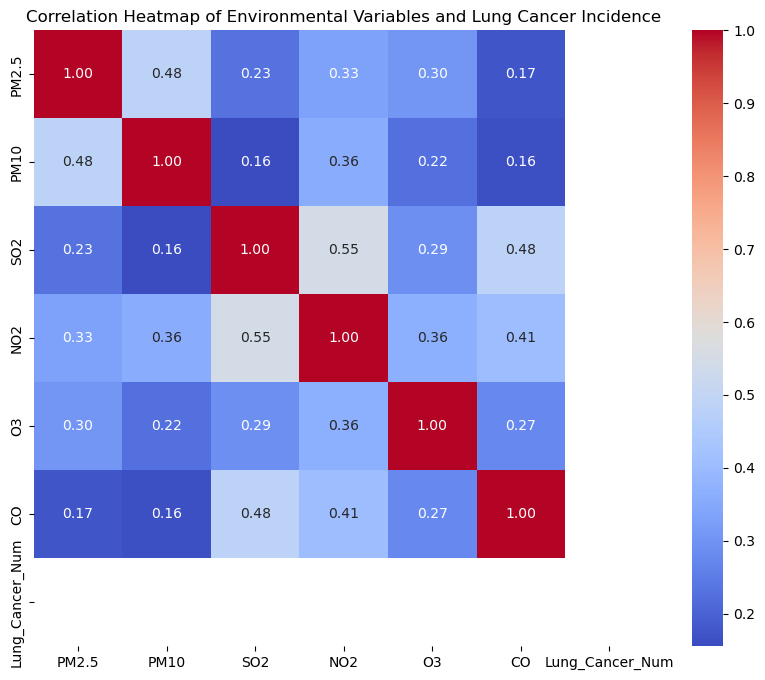

#### Symptoms and behavior that may have a relationship with lung cancer


### Trends in air quality over time and their potential impact on lung cancer rates


In [20]:

df_air = pd.read_csv('/Users/moosarahman/Desktop/cs329e/proj/airovertime.csv')
df_air.head()



,Date,PM2.5 AQI Value,Main Pollutant,Site Name,Site ID,Source
0,01/01/2000,152,NaN,Austin Webberville Rd,48-453-0021,AQS
1,01/02/2000,54,NaN,Austin Audubon Society,48-453-0020,AQS
2,01/03/2000,31,NaN,Austin Webberville Rd,48-453-0021,AQS
3,01/04/2000,21,NaN,Austin Webberville Rd,48-453-0021,AQS
4,01/05/2000,56,NaN,Austin Webberville Rd,48-453-0021,AQS


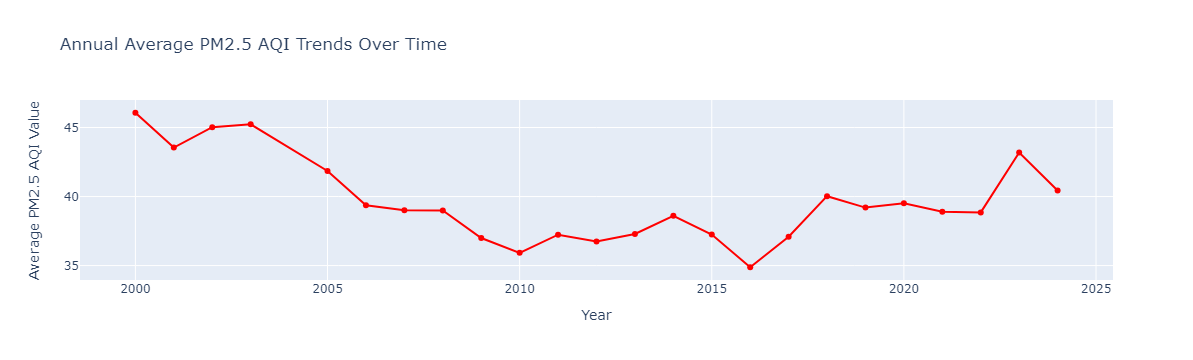

In [16]:
df = pd.read_csv('/Users/moosarahman/Desktop/cs329e/proj/airovertime.csv')  
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df_yearly_avg = df.groupby('Year')['PM2.5 AQI Value'].mean().reset_index()


fig = px.line(df_yearly_avg, x='Year', y='PM2.5 AQI Value', title='Annual Average PM2.5 AQI Trends Over Time', 
              labels={'PM2.5 AQI Value': 'Average PM2.5 AQI Value'},
              markers=True, 
              color_discrete_sequence=['red']) 

fig.update_layout(xaxis_title='Year', yaxis_title='Average PM2.5 AQI Value')
fig.update_traces(mode='lines+markers')  

fig.show()


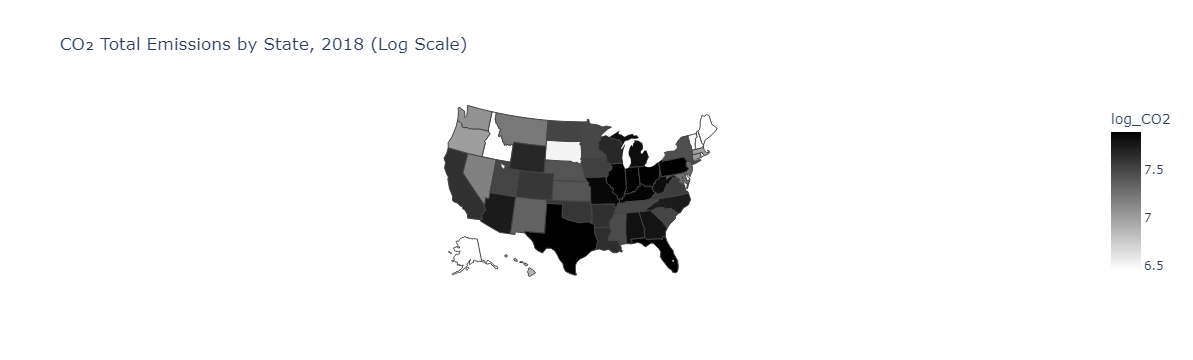

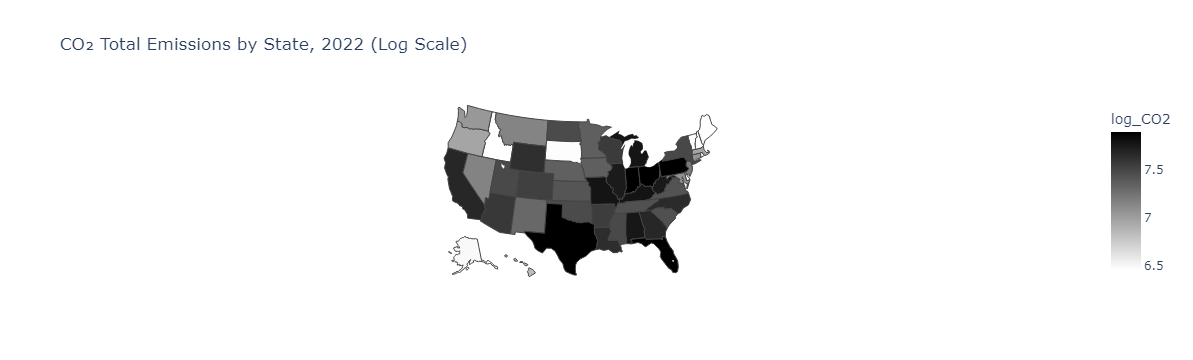

In [66]:
import pandas as pd
import plotly.express as px
import numpy as np


# Assuming 'emissions_2018' and 'emissions_2022' DataFrames are already loaded
emissions_2018 = pd.read_csv('/Users/moosarahman/Desktop/cs329e/proj/emis2018.csv')
emissions_2022 = pd.read_csv('/Users/moosarahman/Desktop/cs329e/proj/emis2022.csv')

# Define the mapping dictionary for state names (in all capitals) to their two-letter abbreviations
state_abbreviations = {
    'ALABAMA': 'AL', 'ALASKA': 'AK', 'ARIZONA': 'AZ', 'ARKANSAS': 'AR',
    'CALIFORNIA': 'CA', 'COLORADO': 'CO', 'CONNECTICUT': 'CT', 'DELAWARE': 'DE',
    'FLORIDA': 'FL', 'GEORGIA': 'GA', 'HAWAII': 'HI', 'IDAHO': 'ID',
    'ILLINOIS': 'IL', 'INDIANA': 'IN', 'IOWA': 'IA', 'KANSAS': 'KS',
    'KENTUCKY': 'KY', 'LOUISIANA': 'LA', 'MAINE': 'ME', 'MARYLAND': 'MD',
    'MASSACHUSETTS': 'MA', 'MICHIGAN': 'MI', 'MINNESOTA': 'MN', 'MISSISSIPPI': 'MS',
    'MISSOURI': 'MO', 'MONTANA': 'MT', 'NEBRASKA': 'NE', 'NEVADA': 'NV',
    'NEW HAMPSHIRE': 'NH', 'NEW JERSEY': 'NJ', 'NEW MEXICO': 'NM', 'NEW YORK': 'NY',
    'NORTH CAROLINA': 'NC', 'NORTH DAKOTA': 'ND', 'OHIO': 'OH', 'OKLAHOMA': 'OK',
    'OREGON': 'OR', 'PENNSYLVANIA': 'PA', 'RHODE ISLAND': 'RI', 'SOUTH CAROLINA': 'SC',
    'SOUTH DAKOTA': 'SD', 'TENNESSEE': 'TN', 'TEXAS': 'TX', 'UTAH': 'UT',
    'VERMONT': 'VT', 'VIRGINIA': 'VA', 'WASHINGTON': 'WA', 'WEST VIRGINIA': 'WV',
    'WISCONSIN': 'WI', 'WYOMING': 'WY'
}



emissions_2018 = emissions_2018[emissions_2018['STATE'].isin(state_abbreviations.keys())]
emissions_2018['STATE'] = emissions_2018['STATE'].map(state_abbreviations)

emissions_2022 = emissions_2022[emissions_2022['STATE'].isin(state_abbreviations.keys())]
emissions_2022['STATE'] = emissions_2022['STATE'].map(state_abbreviations)

# Normalize the data using a logarithmic scale
emissions_2018['log_CO2'] = np.log10(emissions_2018['CO22018'] + 1)
emissions_2022['log_CO2'] = np.log10(emissions_2022['CO22022'] + 1)

# Determine quantiles for color scale range
quant_10 = emissions_2018['log_CO2'].quantile(0.10)
quant_90 = emissions_2018['log_CO2'].quantile(0.90)

white_to_red = ['white', 'black']

# Create the choropleth map for 2018 with a white-to-red color scale
fig_2018 = px.choropleth(
    emissions_2018,
    locations='STATE',
    locationmode='USA-states',
    color='log_CO2',
    color_continuous_scale=white_to_red,  # Custom white to red color scale
    range_color=[quant_10, quant_90],
    scope='usa',
    title='CO₂ Total Emissions by State, 2018 (Log Scale)'
)

# Create the choropleth map for 2022 with a white-to-red color scale
fig_2022 = px.choropleth(
    emissions_2022,
    locations='STATE',
    locationmode='USA-states',
    color='log_CO2',
    color_continuous_scale=white_to_red,  # Custom white to red color scale
    range_color=[quant_10, quant_90],
    scope='usa',
    title='CO₂ Total Emissions by State, 2022 (Log Scale)'
)

fig_2018.show()
fig_2022.show()